# **Détermination du meilleur modèle**

Nous avons pré-évalué 3 types de modèles, régression logistique, forêt aléatoire et LightGBM, sur la base d'un petit échantillon.

Il s'agit à présent de passer à l'échelle, avec d'une part un échantillon plus important, et une recherche en grille des meilleures configurations.

Il ne s'agit pas seulement de faire jouer les hyper-paramètres de la LGBM, qui est la meilleure candidate pour la haute performance, mais de jouer également sur les paramètres liés à la préparation des données, l'échantillonnage équilibré et la mise à l'échelle des données.

Nous n'utiliserons pas la pipeline de SKL, étant donné que notre fonction `kfold_train_and_eval_model` en est déjà une.

**Note du 5 mai** - Dans l'obligation de livrer sans disposer d'un temps raisonnable pour couvrir l'ensemble des demandes, nous nous voyons dans l'obligation de passer aux étapes aval sans avoir pu mener une véritable recherche en grille avec variation des combinaison d'hyperparamètres, ni sans avoir également fait varier les paramètres de pré-traitement des données, alors que le framework pour le faire est en place. Ce n'est donc pas une faute de conception ou de méthodologie, mais un manque de moyens alloués pour réaliser cette stratégie.

Nous nous contentons donc ici de dérouler la pipeline d'entrainement et de mesure des performances prédictives élaborée dans les sections précédentes et en particulier dans la section `kfold_train_and_eval_model_v2`.

Ce que nous faisons varier :
1. Les 3 modèles, à paramètres fixes, en anticipant que la LightGBM donnera les meilleurs résultats.
2. Les tailles des échantillons d'entrainement : 
    * `_10k` : échantillon de $10\,000$ individus (3.25\,\%$).
    * `_100k` : échantillon de $100\,000$ individus (32.5\,\%$).
    * `_50pcts` : échantillon de $50\,\%$ de la population ($153\,756$ individus).
    * `_75pcts` : échantillon de $75\,\%$ de la population ($230\,633$ individus).
    * `_85pcts` : échantillon de $85\,\%$ de la population ($261\,384$ individus).
    * `_95pcts` : échantillon de $95\,\%$ de la population ($292\,135$ individus).
3. les seuils de prédiction des cas positifs : 50 %, 45 %, 40 %, 35 %

Pour des raisons pratiques, nous divisons cette évaluation en 3 sections principales, une par type de modèle, puis en sections secondaires, une par taille d'échantillon.

Les détails des étapes ayant été explicités plus hauts, nous nous contentons ici du code, dense, et des rapports générés qui sont suffisamment explicites. Quelques commentaires viendront compléter ici et là les résultats remarquables observables dans les rapports.

Pour satisfaire l'une des exigences pléthoriques du projet, les expériences menées ci-après seront enregistrées dans une instance `mlflow` (un dossier `mlruns/` local qui fera partie du livrable). Notons que cela nous oblige de quitter Python 3.11 et ses performances amliorées pour un retour à Python 3.10.

# À exécuter avant de démarrer

Fixe la localisation du dossier `mlruns/` dans le sous dossier `tmp/` du projet.

A défaut, le lancement depuis ce notebook va créer un dossier `mlruns/` comme sous-dossier du dossier parent, donc dans le dossier `notebooks/experiments`.

In [ ]:
import mlflow
from home_credit.load import get_mlflow_dir
print("default `mlruns/`:", mlflow.get_tracking_uri())
mlflow.set_tracking_uri("file://" + get_mlflow_dir())
print("this project `mlruns/`:", mlflow.get_tracking_uri())

default `mlruns/`: file:///c:/Users/franc/Projects/pepper_credit_scoring_tool/notebooks/experiments/mlruns
this project `mlruns/`: file://C:\Users\franc\Projects\pepper_credit_scoring_tool\tmp\mlruns


Pour rappel, pour visualiser dans l'UI les enregistrements de modèles et d'expériences dans mlflow :

Depuis le terminal, soit se déplacer jusqu'au sous-dossier `tmp/` du projet :

```sh
$ py3105 -m mlflow ui
```

Soit, de n'importe où :

```sh
$ py3105 -m mlflow ui --backend-store-uri <path_to_mlruns>
```

Une fois lancé, s'il ne rencontre pas de problème au démarrage, il indique à quelle URL:port on peut y accéder depuis un navigateur, en l'occurrence, l'adresse est celle générique de `localhost` :

```sh
INFO:waitress:Serving on http://127.0.0.1:5000
```

# Régression logistique

## **`50p`**

default `mlruns/`: file://C:\Users\franc\Projects\pepper_credit_scoring_tool\tmp\mlruns
this project `mlruns/`: file://C:\Users\franc\Projects\pepper_credit_scoring_tool\tmp\mlruns


2023/05/06 14:23:50 INFO mlflow.tracking.fluent: Experiment with name 'LogisticRegression_train_baseline_50pcts' does not exist. Creating a new experiment.



Starting train and eval of:
Labeled dataset of shape: (153756, 790)
Features set of shape: (153756, 788)

With:
Classifier: 


LogisticRegression(C=0.0001, random_state=42)

Loss function: 


{'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

Eval metrics: 


{'F2': <function home_credit.best_model_search.<lambda>(y, y_pred)>,
 'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

On 5 KFolds: 

Resampling
Sampler: 


RandomUnderSampler(random_state=42)

Original dataset shape: Counter({0.0: 141324, 1.0: 12432})
Resampled dataset shape: Counter({0.0: 12432, 1.0: 12432})
Data shape: (24864, 788)

Evaluate the 1-th fold (on 5)
Fold  0 F2: 0.647092
Fold  0 AUC: 0.691855

Evaluate the 2-th fold (on 5)
Fold  1 F2: 0.645044
Fold  1 AUC: 0.687888

Evaluate the 3-th fold (on 5)
Fold  2 F2: 0.644187
Fold  2 AUC: 0.685698

Evaluate the 4-th fold (on 5)
Fold  3 F2: 0.641015
Fold  3 AUC: 0.684159

Evaluate the 5-th fold (on 5)
Fold  4 F2: 0.641322
Fold  4 AUC: 0.692186
Full F2: 0.643725
Full AUC: 0.688243
Train time (min.): 1.0

Post train eval with threshold of 45.0 %
X : shape (307511, 788)	y class counts : (array([0., 1.]), array([282686,  24825], dtype=int64))
Xs : shape (153756, 788)	ys class counts : (array([0., 1.]), array([141324,  12432], dtype=int64))
Xrs : shape (24864, 788)	yrs class counts : (array([0., 1.]), array([12432, 12432], dtype=int64))
Xv : shape (153755, 788)	yv class counts : (array([0., 1.]), array([141362,  12393], dtype=

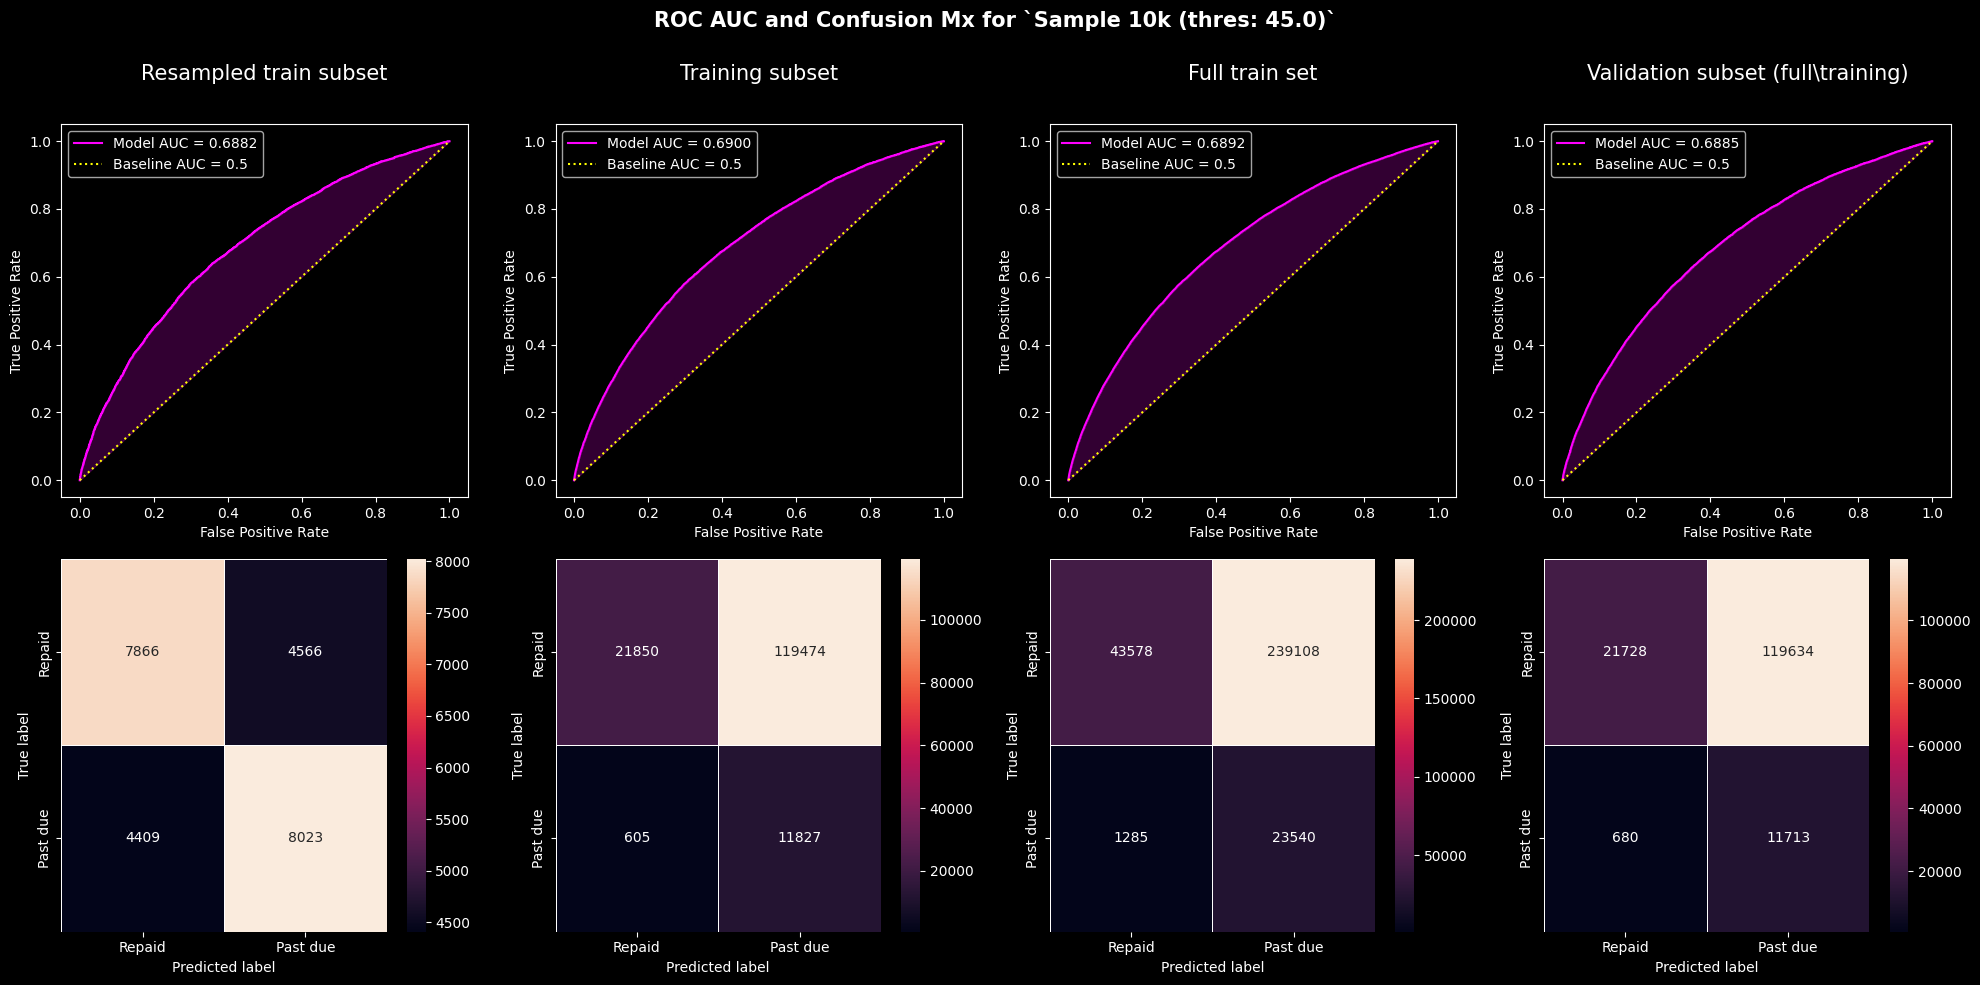


Validation set metrics
ROC AUC: 0.6884684595786571
Accuracy: 0.2174953660043576
ARI: -0.052512866504493064
Jaccard Index: 0.12201671841762476
Precision: 0.2174953660043576
Recall: 0.2174953660043576
F1: 0.2174953660043576
F2: 0.2174953660043576
F4: 0.2174953660043576
F8: 0.2174953660043576
F16: 0.2174953660043576

Undersampled validation set metrics
Original dataset shape Counter({0.0: 141362, 1.0: 12393})
Resampled dataset shape Counter({0.0: 12393, 1.0: 12393})
ROC AUC: 0.686434068151416
Accuracy: 0.550956184943113
ARI: 0.010371017901365603
Jaccard Index: 0.3802205145339125
Precision: 0.550956184943113
Recall: 0.550956184943113
F1: 0.550956184943113
F2: 0.550956184943113
F4: 0.550956184943113
F8: 0.550956184943113
F16: 0.550956184943113


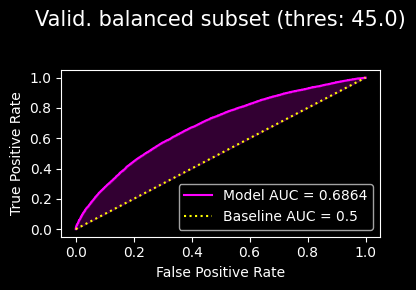

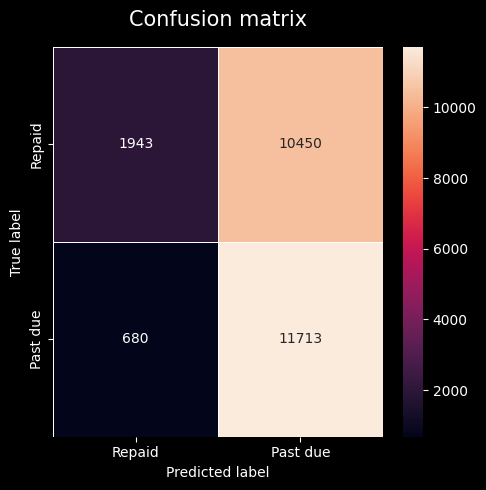

45 % exp res: AUC (0.686434068151416), FNR (0.34997426659804426), FPR (0.8921710919491164)

Post train eval with threshold of 40.0 %
X : shape (307511, 788)	y class counts : (array([0., 1.]), array([282686,  24825], dtype=int64))
Xs : shape (153756, 788)	ys class counts : (array([0., 1.]), array([141324,  12432], dtype=int64))
Xrs : shape (24864, 788)	yrs class counts : (array([0., 1.]), array([12432, 12432], dtype=int64))
Xv : shape (153755, 788)	yv class counts : (array([0., 1.]), array([141362,  12393], dtype=int64))


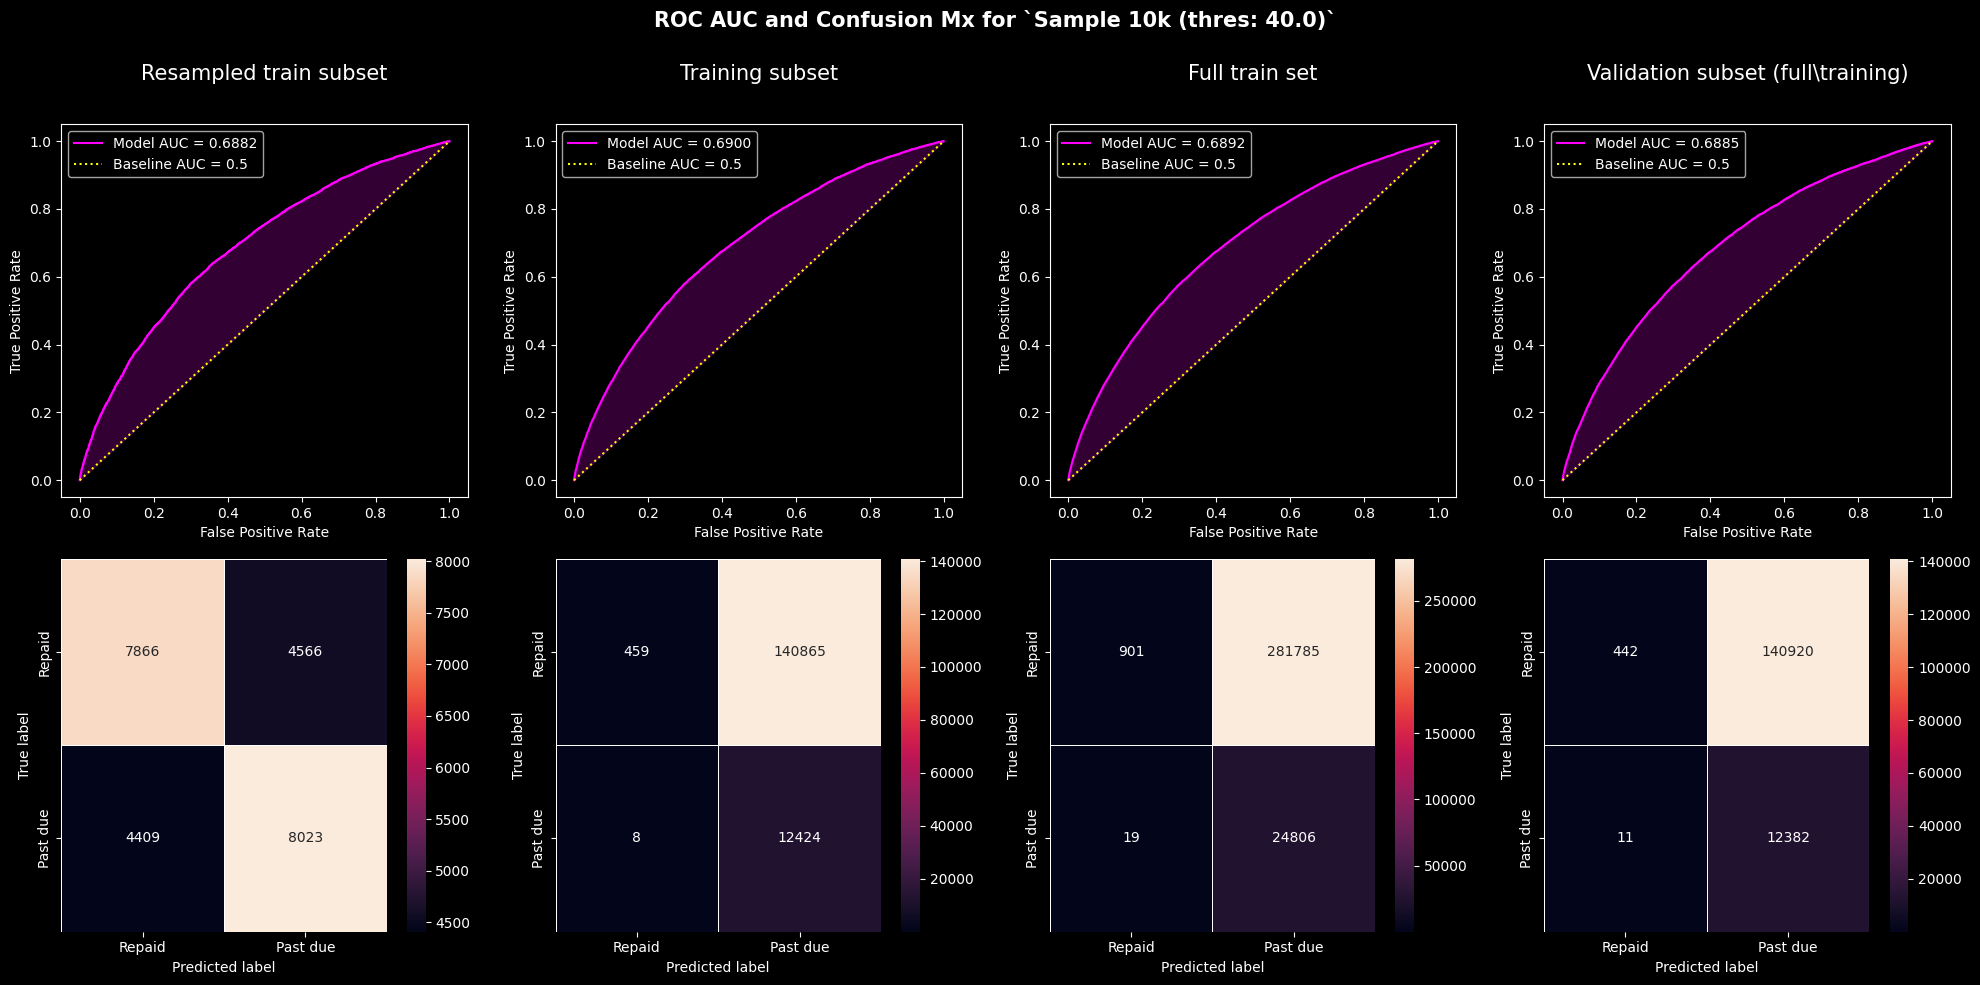


Validation set metrics
ROC AUC: 0.6884684595786571
Accuracy: 0.08340541770999317
ARI: -0.003631511686791561
Jaccard Index: 0.04351750676991781
Precision: 0.08340541770999317
Recall: 0.08340541770999317
F1: 0.08340541770999317
F2: 0.08340541770999317
F4: 0.08340541770999317
F8: 0.08340541770999317
F16: 0.08340541770999317

Undersampled validation set metrics
Original dataset shape Counter({0.0: 141362, 1.0: 12393})
Resampled dataset shape Counter({0.0: 12393, 1.0: 12393})
ROC AUC: 0.686434068151416
Accuracy: 0.5008875978374889
ARI: 2.8653339224595924e-06
Jaccard Index: 0.33412277632747533
Precision: 0.5008875978374889
Recall: 0.5008875978374889
F1: 0.5008875978374889
F2: 0.5008875978374889
F4: 0.5008875978374889
F8: 0.5008875978374889
F16: 0.5008875978374889


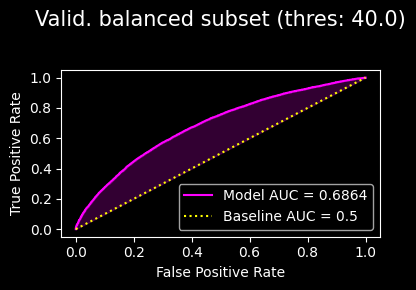

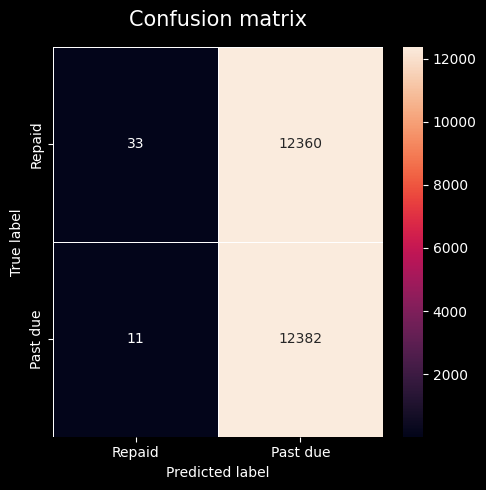

40 % exp res: AUC (0.686434068151416), FNR (0.3333333333333333), FPR (0.9982232272653853)

Post train eval with threshold of 35.0 %
X : shape (307511, 788)	y class counts : (array([0., 1.]), array([282686,  24825], dtype=int64))
Xs : shape (153756, 788)	ys class counts : (array([0., 1.]), array([141324,  12432], dtype=int64))
Xrs : shape (24864, 788)	yrs class counts : (array([0., 1.]), array([12432, 12432], dtype=int64))
Xv : shape (153755, 788)	yv class counts : (array([0., 1.]), array([141362,  12393], dtype=int64))


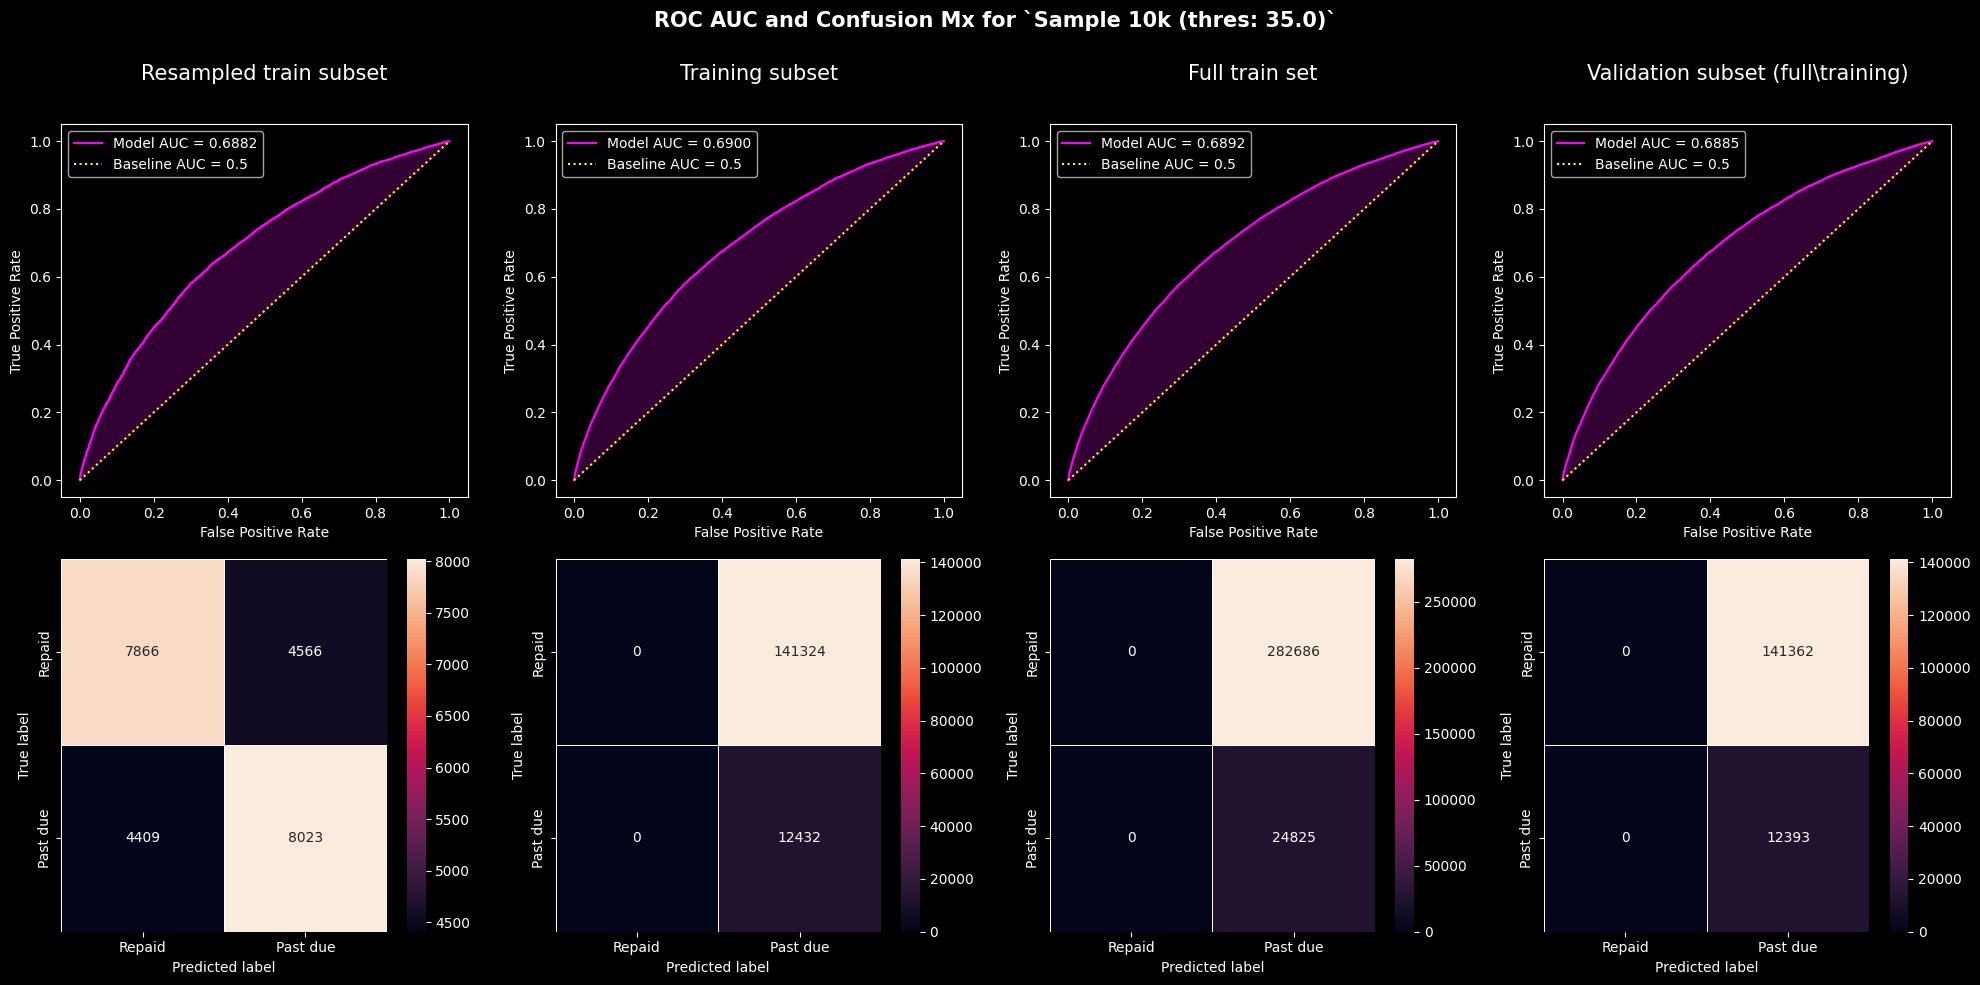


Validation set metrics
ROC AUC: 0.6884684595786571
Accuracy: 0.08060225683717602
ARI: 0.0
Jaccard Index: 0.04199351443664716
Precision: 0.08060225683717602
Recall: 0.08060225683717602
F1: 0.08060225683717602
F2: 0.080602256837176
F4: 0.08060225683717602
F8: 0.08060225683717602
F16: 0.08060225683717602

Undersampled validation set metrics
Original dataset shape Counter({0.0: 141362, 1.0: 12393})
Resampled dataset shape Counter({0.0: 12393, 1.0: 12393})
ROC AUC: 0.686434068151416
Accuracy: 0.5
ARI: 0.0
Jaccard Index: 0.3333333333333333
Precision: 0.5
Recall: 0.5
F1: 0.5
F2: 0.5
F4: 0.5
F8: 0.5
F16: 0.5


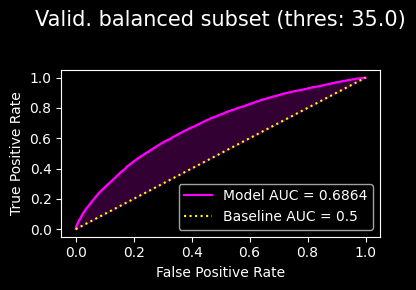

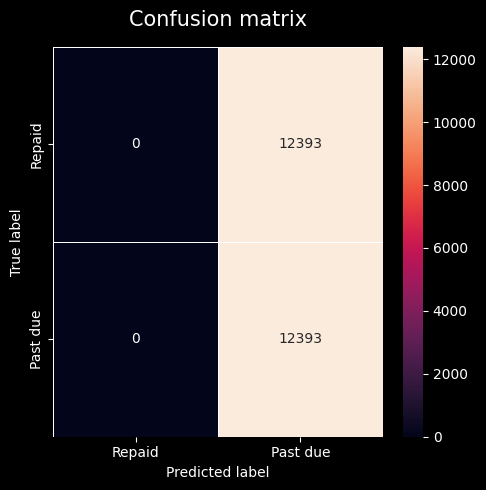

C:\Users\franc\Projects\pepper_credit_scoring_tool\modules\home_credit\mlflow_tracking.py:83: RuntimeWarning: invalid value encountered in longlong_scalars
  fnr, fpr = fn / tn, fp / tp


35 % exp res: AUC (0.686434068151416), FNR (nan), FPR (1.0)
Mlflow run (64e825c4aee04e40b8f129c8fd123849) completed


In [ ]:
from sklearn import linear_model
from home_credit.mlflow_tracking import do_first_experiment

run_id = do_first_experiment(
    trainset_name="train_baseline_50p",
    clf=linear_model.LogisticRegression(C=1e-4, random_state=42)
)
print(f"Mlflow run ({run_id}) completed")